In [1]:
using DataFrames, DataFramesMeta, JSON, Statistics

using AlgebraOfGraphics, AbstractPlotting, CairoMakie
using AlgebraOfGraphics: linear, smooth

In [2]:
inp = []
for fname in readdir()
    name, ext = splitext(fname)
    if ext == ".json"
        fields = split(fname, '_')
        if fields[1] == "poisson" || fields[1] == "constant"
            j = JSON.parsefile(fname; dicttype=Dict, inttype=Int64)
            push!(inp, (fields, j, name))
        end
    end
end

In [3]:
df = DataFrame(
    name = String[],
    arrival_type = String[],
    arrival_rate = Int[],
    vehicles = Int[],
    time_windows = Int[],
    locations = Int[],
    policy = String[],
    day = Int[],
    packages = Int[],
    avg_days_taken = Float64[],
    total_distance = Int[],
    total_time = Int[],
    deliveries = Int[],
    attempted_deliveries = Int[]
)
for v in inp
    for record in v[2]
        push!(df, (
            v[3],
            v[1][1],
            parse(Int, v[1][2]),
            parse(Int, v[1][3]),
            parse(Int, v[1][4]),
            parse(Int, v[1][5]),
            v[1][6],
            record["day"],
            record["number_of_packages"],
            mean(record["delivered_packages"]["days_taken"]),
            sum(record["distances"]),
            sum(record["times"]),
            length(record["delivered_packages"]["days_taken"]),
            sum(record["deliveries_attempted"]),
        ))
    end
end

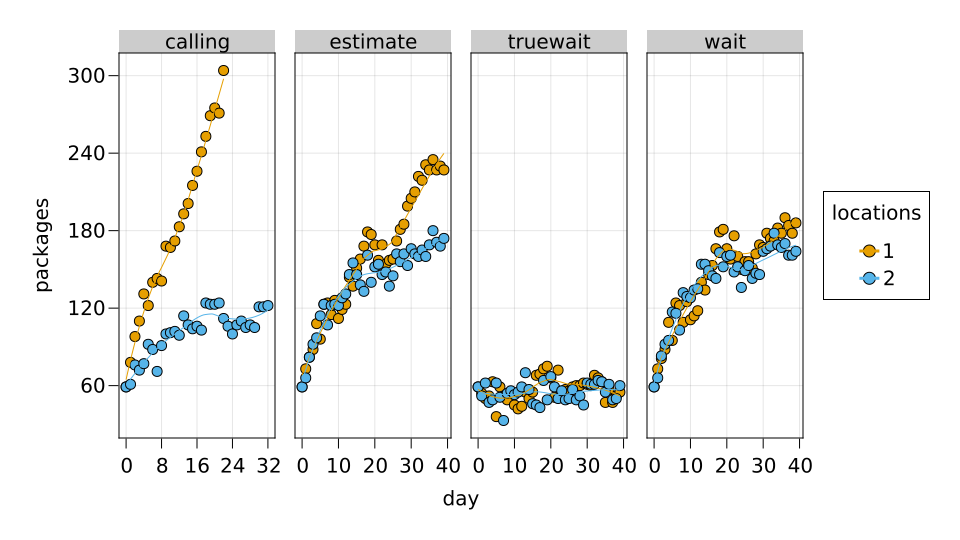

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /home/michael/.julia/packages/AbstractPlotting/T806p/src/display.jl:135


In [4]:
q = @linq df |>
    transform(packages = :packages ./ :locations) |>
    where(:day .>= 0) |> 
    where(:arrival_type .== "poisson")
cols = style(:day, :packages)
scat = spec(Scatter)
pipeline2 = cols * scat

grp = style(layout_x = :policy => categorical, color = :locations => categorical)
data(q) * cols * grp * (scat + smooth(span=0.8)) |> draw

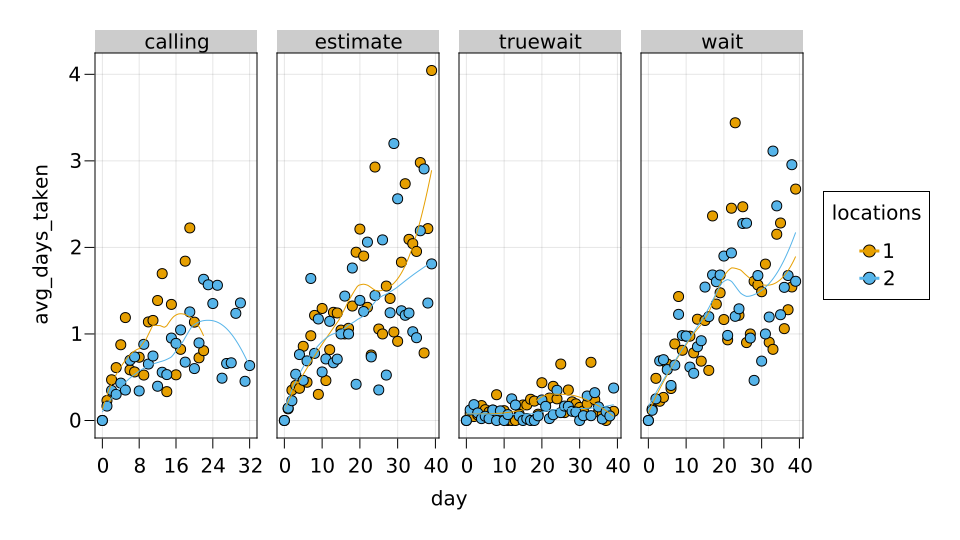

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /home/michael/.julia/packages/AbstractPlotting/T806p/src/display.jl:135


In [5]:
q = @linq df |>
    transform(packages = :packages ./ :locations) |>
    where(:day .>= 0) |> 
    where(:arrival_type .== "poisson")
cols = style(:day, :avg_days_taken)
scat = spec(Scatter)
pipeline2 = cols * scat

grp = style(layout_x = :policy => categorical, color = :locations => categorical)
data(q) * cols * grp * (scat + smooth(span=0.8)) |> draw